Episode 1: Total Reward = 15.0
Episode 2: Total Reward = 15.0
Episode 3: Total Reward = 9.0
Episode 4: Total Reward = 13.0
Episode 5: Total Reward = 13.0
Episode 6: Total Reward = 40.0
Episode 7: Total Reward = 28.0
Episode 8: Total Reward = 18.0
Episode 9: Total Reward = 15.0
Episode 10: Total Reward = 17.0


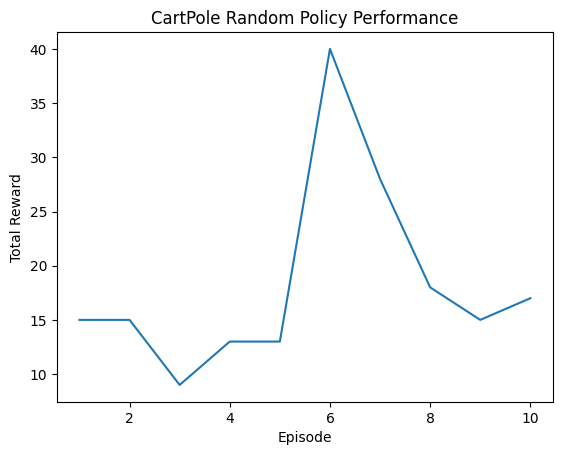

In [13]:
import gymnasium as gym
import random
import matplotlib.pyplot as plt

env = gym.make("CartPole-v1", render_mode="human")

num_episodes = 10
rewards = []

for episode in range(num_episodes):
    obs, info = env.reset()
    done = False
    total_reward = 0
    step = 0

    while not done:
        action = random.choice([0, 1])
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        step += 1

        if terminated or truncated:
            done = True

    rewards.append(total_reward)
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

env.close()

# Plotting the rewards
plt.plot(range(1, num_episodes + 1), rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("CartPole Random Policy Performance")
plt.show()


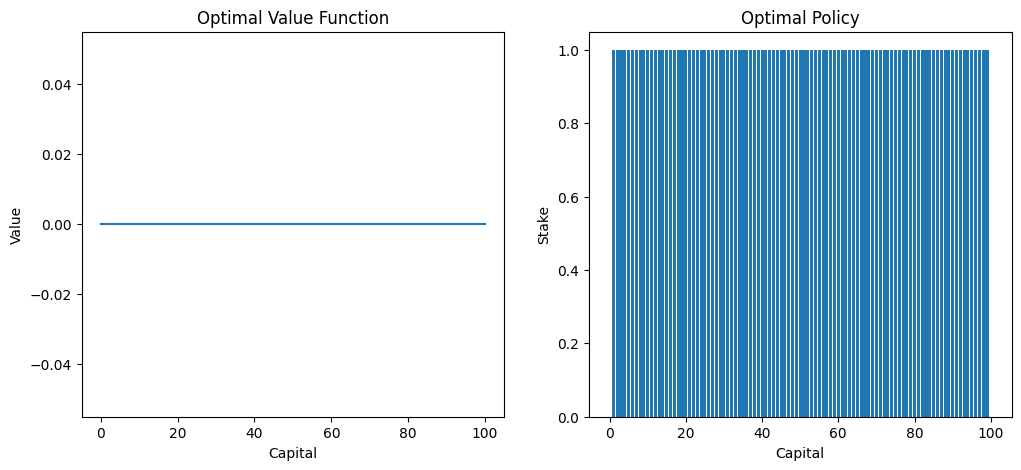

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def gambler_value_iteration(p_h=0.4, theta=1e-9, gamma=1.0):
    goal = 100
    V = np.zeros(goal + 1)
    policy = np.zeros(goal + 1)

    while True:
        delta = 0
        for s in range(1, goal):
            actions = np.arange(1, min(s, goal - s) + 1)
            action_returns = [p_h * (gamma * V[s + a]) + (1 - p_h) * (gamma * V[s - a]) for a in actions]
            max_return = max(action_returns)
            delta = max(delta, abs(max_return - V[s]))
            V[s] = max_return

        if delta < theta:
            break

    for s in range(1, goal):
        actions = np.arange(1, min(s, goal - s) + 1)
        action_returns = [p_h * (gamma * V[s + a]) + (1 - p_h) * (gamma * V[s - a]) for a in actions]
        policy[s] = actions[np.argmax(action_returns)]

    return V, policy

def plot_results(V, policy):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(V)
    plt.xlabel("Capital")
    plt.ylabel("Value")
    plt.title("Optimal Value Function")

    plt.subplot(1, 2, 2)
    plt.bar(range(len(policy)), policy)
    plt.xlabel("Capital")
    plt.ylabel("Stake")
    plt.title("Optimal Policy")

    plt.show()

if __name__ == "__main__":
    V, policy = gambler_value_iteration()
    plot_results(V, policy)